## Thresholding, Binarization & Adaptive Thresholding


In thresholding, we convert a grey scale image to it's binary form. Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). 

## Goal

In this lecture :
- In this tutorial, you will learn Simple thresholding, Adaptive thresholding, Otsu’s thresholding etc.
- You will learn these functions : cv2.threshold, cv2.adaptiveThreshold etc.

## Thresholding comes in three forms:

1. We have simple thresholding where we manually supply parameters to segment the image — this works extremely well in controlled lighting conditions where we can ensure high contrast between the foreground and background of the image.

2. We also have methods such as Otsu’s thresholding that attempt to be more dynamic and automatically compute the optimal threshold value based on the input image.

3. And finally we have adaptive thresholding which, instead of trying to threshold an image globally using a single value, instead breaks the image down into smaller pieces, and thresholds each of these pieces separately and individually.

## Let's first see simple thresholding

The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

Two outputs are obtained. First one is a retval which is the thresholde valur (used mainly with OTSU method). Second output is our thresholded image.


In [16]:
import cv2
import numpy as np

# Load our image as greyscale 
image = cv2.imread('images/gradient.jpg',0)
cv2.imshow('Original', image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary', thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('2 Threshold Binary Inverse', thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
cv2.imshow('3 THRESH TRUNC', thresh3)

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
cv2.imshow('4 THRESH TOZERO', thresh4)

# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('5 THRESH TOZERO INV', thresh5)
cv2.waitKey(0) 
    
cv2.destroyAllWindows()

## Let's now continue with Otsu thresholding

In the previous section on simple thresholding we needed to manually supply a threshold value of T. For simple images in controlled lighting conditions, it might be feasible for us to hardcode this value.

But in real-world conditions where we do not have any a priori knowledge of the lighting conditions, we actually automatically compute an optimal value of T using Otsu’s method.

Otsu’s method assumes that our image contains two classes of pixels: the background and the foreground.

**Furthermore, Otsu’s method makes the assumption that the grayscale histogram of our pixel intensities of our image is bi-modal, which simply means that the histogram is two peaks.**

For example, take a look at the following image of a prescription pill and its associated grayscale histogram: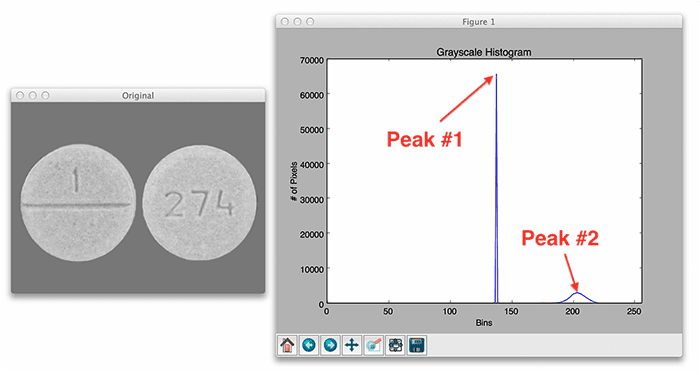

Notice how the histogram clearly has two peaks — the first sharp peak corresponds to the uniform background color of the image, while the second peak corresponds to the pill region itself.

Based on the grayscale histogram, Otsu’s method then computes an optimal threshold value T such that the variance between the background and foreground peaks is minimal.

However, Otsu’s method has no a priori knowledge of what pixels belong to the foreground and which pixels belong to the background — it’s simply trying to optimally separate the peaks of the histogram.

In [17]:
import cv2
import numpy as np

# Load our new image
image = cv2.imread('images/Origin_of_Species.jpg', 0)

# It's good practice to blur images as it removes noise
blurimage = cv2.GaussianBlur(image, (5, 5), 0)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret1,thresh1 = cv2.threshold(blurimage, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding after Gaussian filtering
ret2, thresh2 = cv2.threshold(blurimage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#show the results
cv2.imshow('Original', image)
cv2.imshow('Threshold Binary', thresh1)
cv2.imshow("Gaussian Otsu's Thresholding", thresh2) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

### Adaptive thresholding?

The biggest downfall of those simple threshold methods is that we need to provide the threshold value (i.e. the 127 value we used previously).

When applying basic thresholding we had to manually supply a threshold value, T, to segment our foreground and our background.
Otsu’s thresholding method can automatically determine the optimal value of T, assuming a bimodal distribution of pixel intensities in our input image.

However, both of these methods are global thresholding techniques, implying that the same value of T is used to test all pixels in the input image, thereby segmenting them into foreground and background.

The problem here is that having just one value of T may not suffice. Due to variations in lighting conditions, shadowing, etc., it may be that one value of T will work for a certain part of the input image but will utterly fail on a different segment.


#### What if there was a smarter way of doing this?

There is with, Adaptive thresholding. 
In simple thresholding, the threshold value is global, i.e., it is same for all the pixels in the image. Adaptive thresholding is the method where the threshold value is calculated for smaller regions and therefore, there will be different threshold values for different regions (see next figure : Top: Original input image. Middle: Applying global thresholding leads to a poor segmentation result. Bottom: Using adaptive thresholding creates a much cleaner segmentation)

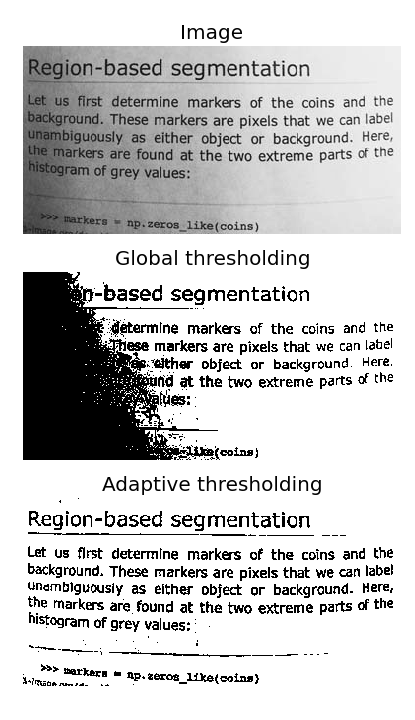

As we discussed earlier, one of the downsides of using simple thresholding methods is that we need to manually supply our threshold value, T. Furthermore, finding a good value of T may require many manual experiments and parameter tunings, which is simply not practical in most situations.

To aid us in automatically determining the value of T, we leveraged Otsu’s method. And while Otsu’s method can save us a lot of time playing the “guess and checking” game, we are left with only a single value of T to threshold the entire image.

For simple images with controlled lighting conditions, this usually isn’t a problem. But for situations when the lighting is non-uniform across the image, having only a single value of T can seriously hurt our thresholding performance.

To overcome this problem, we can use adaptive thresholding, which considers small neighbors of pixels and then finds an optimal threshold value T for each neighbor. This method allows us to handle cases where there may be dramatic ranges of pixel intensities and the optimal value of T may change for different parts of the image.

In adaptive thresholding, sometimes called local thresholding, our goal is to statistically examine the pixel intensity values in the neighborhood of a given pixel, p.

However, choosing the size of the pixel neighborhood for local thresholding is absolutely crucial.

The neighborhood must be large enough to cover sufficient background and foreground pixels, otherwise the value of T will be more or less irrelevant.

But if we make our neighborhood value too large, then we completely violate the assumption that local regions of an image will have approximately uniform illumination. Again, if we supply a very large neighborhood, then our results will look very similar to global thresholding using the simple thresholding or Otsu’s methods.

In practice, tuning the neighborhood size is (usually) not that hard of a problem. You’ll often find that there is a broad range of neighborhood sizes that provide you with adequate results — it’s not like finding an optimal value of T that could make or break your thresholding output.


#### Mathematics underlying adaptive thresholding
As I mentioned above, our goal in adaptive thresholding is to statistically examine local regions of our image and determine an optimal value of T for each region — which begs the question: Which statistic do we use to compute the threshold value T for each region?

It is common practice to use either the arithmetic mean or the Gaussian mean of the pixel intensities in each region (other methods do exist, but the arithmetic mean and the Gaussian mean are by far the most popular).

In the arithmetic mean, each pixel in the neighborhood contributes equally to computing T. And in the Gaussian mean, pixel values farther away from the (x, y)-coordinate center of the region contribute less to the overall calculation of T.

The general formula to compute T is thus:

T = mean(IL ) – C

where the mean is either the arithmetic or Gaussian mean, IL is the local sub-region of the image, I, and C is some constant which we can use to fine tune the threshold value T.

In [14]:
import cv2
import numpy as np

# Load our new image
image = cv2.imread('images/Origin_of_Species.jpg', 0)

# It's good practice to blur images as it removes noise
blurimage = cv2.GaussianBlur(image, (5, 5), 0)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret1,thresh1 = cv2.threshold(blurimage, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding after Gaussian filtering
ret2, thresh2 = cv2.threshold(blurimage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Using adaptiveThreshold
thresh3 = cv2.adaptiveThreshold(blurimage, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)

#show the results
cv2.imshow('Original', image)
cv2.imshow('Threshold Binary', thresh1)
cv2.imshow("Gaussian Otsu's Thresholding", thresh2) 
cv2.imshow("Adaptive Mean Thresholding", thresh3) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

## Description cv2.adaptiveThreshold

- The first parameter is  the input image.

- The second parameter is the output threshold value, just as in simple thresholding and Otsu’s method.

- The third argument is the adaptive thresholding method. Here we supply a value of cv2.ADAPTIVE_THRESH_MEAN_C to indicate that we are using the arithmetic mean of the local pixel neighborhood to compute our threshold value of T. We could also supply a value of cv2.ADAPTIVE_THRESH_GAUSSIAN_C (WHICH YOU WILL DO NEXT) to indicate we want to use the Gaussian average — which method you choose is entirely dependent on your application and situation, so you’ll want to play around with both methods.

- The fourth value to cv2.adaptiveThreshold is the threshold method, again just like the simple thresholding and Otsu thresholding methods. Here we pass in a value of cv2.THRESH_BINARY_INV to indicate that any pixel value that passes the threshold test will have an output value of 0. Otherwise, it will have a value of 255.

- The fifth parameter is our pixel neighborhood size. Here you can see that we’ll be computing the mean grayscale pixel intensity value of each 9×9 sub-region in the image to compute our threshold value T.

- The final argument to cv2.adaptiveThreshold is the constant C which I mentioned above — this value simply lets us fine tune our threshold value. There may be situations where the mean value alone is not discriminating enough between the background and foreground — thus by adding or subtracting some value C, we can improve the results of our threshold. Again, the value you use for C is entirely dependent on your application and situation, but this value tends to be fairly easy to tune.